### Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.
Attribute Information:
The explanations of sensor measurements and their brief statistics are given below.

- Variable (Abbr.) Unit Min Max Mean
- Ambient temperature (AT) C â€“6.23 37.10 17.71
- Ambient pressure (AP) mbar 985.85 1036.56 1013.07
- Ambient humidity (AH) (%) 24.08 100.20 77.87
- Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
- Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
- Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
- Turbine after temperature (TAT) C 511.04 550.61 546.16
- Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
- Turbine energy yield (TEY) MWH 100.02 179.50 133.51
- Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
- Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

### 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation, Layer, Lambda
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### 2. Import Data

In [2]:
gt=pd.read_csv('gas_turbines.csv')
gt

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
gt1=gt.copy()
gt1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


### 3. Data Understanding

In [5]:
gt1.shape

(15039, 11)

In [6]:
gt1.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [7]:
gt1.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


### Visualizations

<AxesSubplot:>

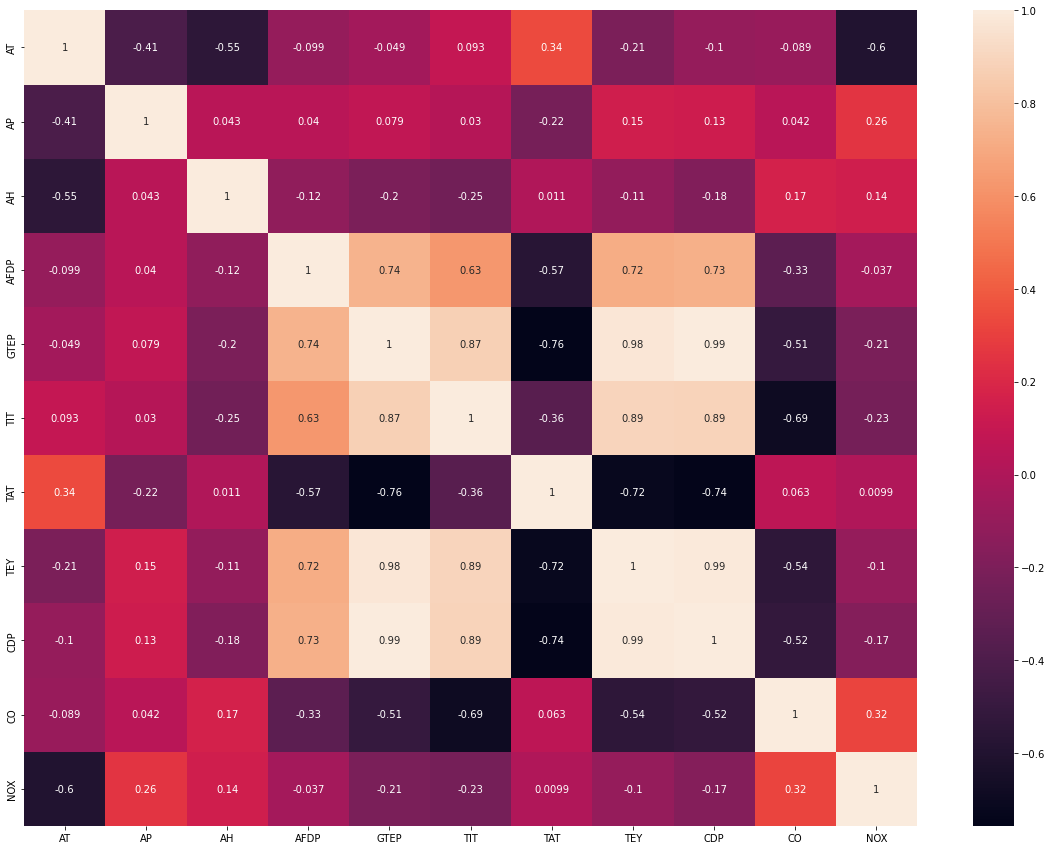

In [8]:
plt.figure(figsize=(20,15))
sns.heatmap(gt1.corr(),annot=True)

### Inference:
Some of the features are highly correlated


In [9]:
gta = gt1[gt1.columns[0:10]]
month_colum = gta.select_dtypes(include='object').columns.tolist()

In [10]:
plt.figure(figsize=(16,10))
for i,col in enumerate(month_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=gta,y=col)
    plt.subplot(2,2,i+2)
    gt1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

<Figure size 1152x720 with 0 Axes>

In [11]:
num_columns = gta.select_dtypes(exclude='object').columns.tolist()

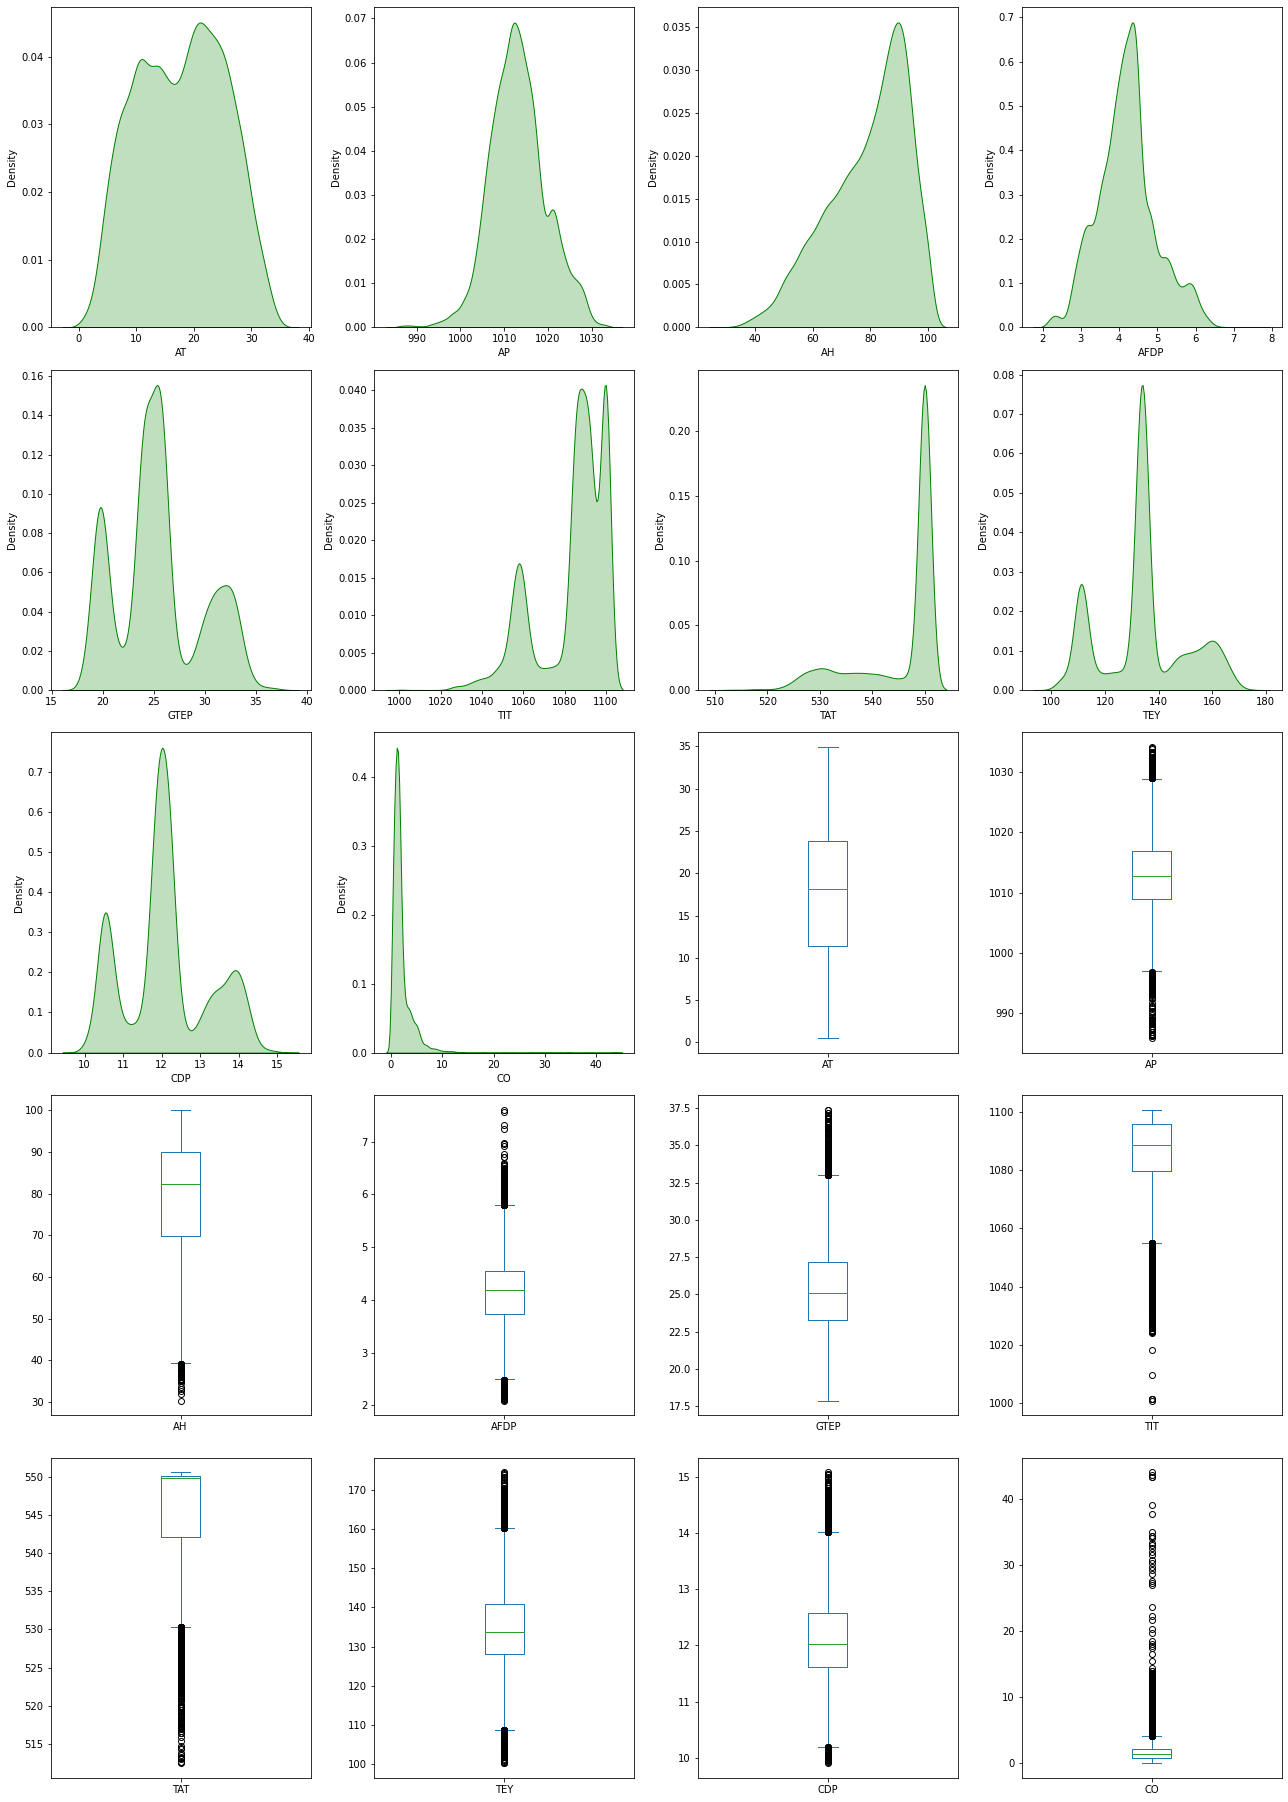

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
skewness,-0.030710,0.107601,-0.681224,0.315150,0.370987,-1.133744,-1.485524,0.145963,0.263042,6.534577
kurtosis,-0.987597,0.424070,-0.282476,0.281642,-0.618358,0.375232,0.847637,-0.487058,-0.589420,82.518116


In [12]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(gt[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    gt[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = gt[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [13]:
gt2=gt1.iloc[:,[0,1,2,7]]
gt2

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72
...,...,...,...,...
15034,9.0301,1005.6,98.460,111.61
15035,7.8879,1005.9,99.093,111.78
15036,7.2647,1006.3,99.496,110.19
15037,7.0060,1006.8,99.008,110.74


### Visualizing Ambient Variables:

(array([ 236., 1297., 1877., 2005., 1880., 2190., 2278., 1884., 1088.,
         304.]),
 array([ 0.5223 ,  3.96297,  7.40364, 10.84431, 14.28498, 17.72565,
        21.16632, 24.60699, 28.04766, 31.48833, 34.929  ]),
 <BarContainer object of 10 artists>)

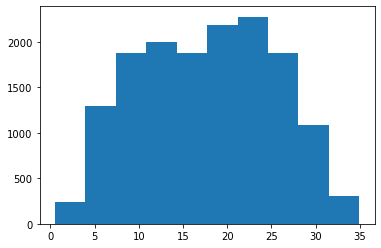

In [14]:
#Ambident Temperature
plt.hist(gt2.AT)

(array([  29.,   47.,  206.,  973., 3477., 4783., 3086., 1668.,  697.,
          73.]),
 array([ 985.85 ,  990.685,  995.52 , 1000.355, 1005.19 , 1010.025,
        1014.86 , 1019.695, 1024.53 , 1029.365, 1034.2  ]),
 <BarContainer object of 10 artists>)

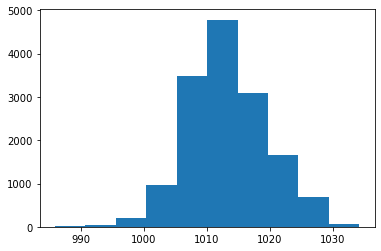

In [15]:
#Ambident Pressure
plt.hist(gt2.AP)

(array([  26.,  145.,  425.,  864., 1296., 1660., 2036., 2799., 3716.,
        2072.]),
 array([ 30.344 ,  37.3296,  44.3152,  51.3008,  58.2864,  65.272 ,
         72.2576,  79.2432,  86.2288,  93.2144, 100.2   ]),
 <BarContainer object of 10 artists>)

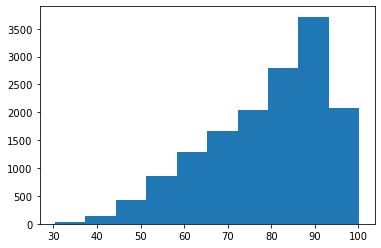

In [16]:
#Ambident Humidity
plt.hist(gt2.AH)

In [17]:
x= gt2.iloc[:,0:-1]
x

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150
...,...,...,...
15034,9.0301,1005.6,98.460
15035,7.8879,1005.9,99.093
15036,7.2647,1006.3,99.496
15037,7.0060,1006.8,99.008


In [18]:
y=gt2.iloc[:,-1]
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [19]:
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(x)
X_standardized = a.transform(x)
pd.DataFrame(X_standardized).describe()

,0,1,2
count,1.503900e+04,1.503900e+04,1.503900e+04
mean,-2.320107e-16,-1.925280e-14,1.844983e-16
std,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.276462e+00,-4.266288e+00,-3.536594e+00
25%,-8.392292e-01,-6.706510e-01,-6.796337e-01
50%,5.566605e-02,-6.227861e-02,2.277844e-01
75%,8.051309e-01,5.772924e-01,7.916582e-01
max,2.266234e+00,3.275970e+00,1.528011e+00


In [20]:
model = Sequential()
model.add(Dense(12, input_dim=3,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(8,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(1,  kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history= model.fit(x, y,validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
1008/1008 [==============================] - 11s 3ms/step - loss: -5701964.5000 - accuracy: 0.0000e+00 - val_loss: -22124210.0000 - val_accuracy: 0.0000e+00
Epoch 2/150
1008/1008 [==============================] - 2s 2ms/step - loss: -76722568.0000 - accuracy: 0.0000e+00 - val_loss: -150602080.0000 - val_accuracy: 0.0000e+00
Epoch 3/150
1008/1008 [==============================] - 2s 2ms/step - loss: -284034656.0000 - accuracy: 0.0000e+00 - val_loss: -431682144.0000 - val_accuracy: 0.0000e+00
Epoch 4/150
1008/1008 [==============================] - 2s 2ms/step - loss: -660426304.0000 - accuracy: 0.0000e+00 - val_loss: -888708608.0000 - val_accuracy: 0.0000e+00
Epoch 5/150
1008/1008 [==============================] - 2s 2ms/step - loss: -1226743168.0000 - accuracy: 0.0000e+00 - val_loss: -1540260480.0000 - val_accuracy: 0.0000e+00
Epoch 6/150
1008/1008 [==============================] - 2s 2ms/step - loss: -2002062464.0000 - accuracy: 0.0000e+00 - val_loss: -2404907008.0000 

1008/1008 [==============================] - 1s 1ms/step - loss: -459802804224.0000 - accuracy: 0.0000e+00 - val_loss: -461865615360.0000 - val_accuracy: 0.0000e+00
Epoch 48/150
1008/1008 [==============================] - 1s 1ms/step - loss: -487220248576.0000 - accuracy: 0.0000e+00 - val_loss: -489130360832.0000 - val_accuracy: 0.0000e+00
Epoch 49/150
1008/1008 [==============================] - 1s 1ms/step - loss: -515694231552.0000 - accuracy: 0.0000e+00 - val_loss: -517435981824.0000 - val_accuracy: 0.0000e+00
Epoch 50/150
1008/1008 [==============================] - 2s 2ms/step - loss: -545234550784.0000 - accuracy: 0.0000e+00 - val_loss: -546784641024.0000 - val_accuracy: 0.0000e+00
Epoch 51/150
1008/1008 [==============================] - 2s 2ms/step - loss: -575855722496.0000 - accuracy: 0.0000e+00 - val_loss: -577199865856.0000 - val_accuracy: 0.0000e+00
Epoch 52/150
1008/1008 [==============================] - 2s 2ms/step - loss: -607580454912.0000 - accuracy: 0.0000e+00 - v

Epoch 93/150
1008/1008 [==============================] - 2s 2ms/step - loss: -3092087570432.0000 - accuracy: 0.0000e+00 - val_loss: -3063177281536.0000 - val_accuracy: 0.0000e+00
Epoch 94/150
1008/1008 [==============================] - 2s 2ms/step - loss: -3187185025024.0000 - accuracy: 0.0000e+00 - val_loss: -3156914733056.0000 - val_accuracy: 0.0000e+00
Epoch 95/150
1008/1008 [==============================] - 2s 2ms/step - loss: -3284200325120.0000 - accuracy: 0.0000e+00 - val_loss: -3252505018368.0000 - val_accuracy: 0.0000e+00
Epoch 96/150
1008/1008 [==============================] - 2s 2ms/step - loss: -3383151296512.0000 - accuracy: 0.0000e+00 - val_loss: -3350008168448.0000 - val_accuracy: 0.0000e+00
Epoch 97/150
1008/1008 [==============================] - 2s 2ms/step - loss: -3484071755776.0000 - accuracy: 0.0000e+00 - val_loss: -3449443057664.0000 - val_accuracy: 0.0000e+00
Epoch 98/150
1008/1008 [==============================] - 2s 2ms/step - loss: -3586938372096.0000 - 

1008/1008 [==============================] - 2s 2ms/step - loss: -9528015847424.0000 - accuracy: 0.0000e+00 - val_loss: -9393739399168.0000 - val_accuracy: 0.0000e+00
Epoch 139/150
1008/1008 [==============================] - 1s 1ms/step - loss: -9727485411328.0000 - accuracy: 0.0000e+00 - val_loss: -9589756002304.0000 - val_accuracy: 0.0000e+00
Epoch 140/150
1008/1008 [==============================] - 2s 2ms/step - loss: -9929738944512.0000 - accuracy: 0.0000e+00 - val_loss: -9788421308416.0000 - val_accuracy: 0.0000e+00
Epoch 141/150
1008/1008 [==============================] - 2s 1ms/step - loss: -10134779592704.0000 - accuracy: 0.0000e+00 - val_loss: -9989899943936.0000 - val_accuracy: 0.0000e+00
Epoch 142/150
1008/1008 [==============================] - 1s 1ms/step - loss: -10342648250368.0000 - accuracy: 0.0000e+00 - val_loss: -10194025185280.0000 - val_accuracy: 0.0000e+00
Epoch 143/150
1008/1008 [==============================] - 1s 1ms/step - loss: -10553274662912.0000 - accu